# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [266]:
#!pip install pandas

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [268]:
! pip install pandas-profiling[notebook,html]

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [269]:
data = pd.read_csv("AB_NYC_2019.csv")

In [270]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


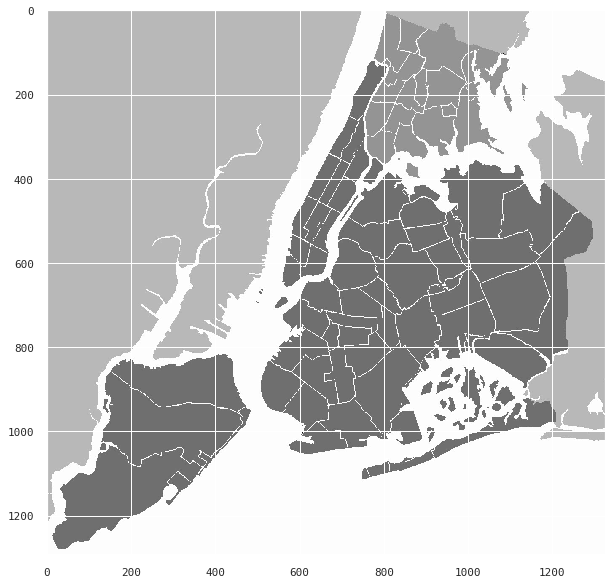

In [271]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

In [272]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [273]:
profile

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

In [274]:
100 * data.isna().sum() / data.shape[0]

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [275]:
data.last_review.fillna(0, inplace = True)

In [276]:
data.reviews_per_month.fillna(0, inplace  = True)

In [277]:
data.price = data.price.replace({0: np.nan})

In [278]:
100 * data.isna().sum() / data.shape[0]

id                                0.000000
name                              0.032723
host_id                           0.000000
host_name                         0.042949
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.022497
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [279]:
data.dropna(inplace = True)

In [280]:
100 * data.isna().sum() / data.shape[0]

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

# Les données sont desormais nettoyées et prêtes a l'emploi

## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

In [281]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.884700e+04,4.884700e+04,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000
mean,1.902300e+07,6.763372e+07,40.728945,-73.952176,152.774705,7.012365,23.270621,1.091014,7.149016,112.799599
std,1.098410e+07,7.862959e+07,0.054529,0.046161,240.248498,20.021362,44.550647,1.597200,32.968270,131.615947
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475094e+06,7.814734e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968202e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915833e+07,1.074344e+08,40.763110,-73.936295,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [282]:
import seaborn as sns
sns.set(color_codes=True)

In [283]:
data.host_name.describe()

count       48847
unique      11448
top       Michael
freq          417
Name: host_name, dtype: object

In [284]:
data.name.describe()

count              48847
unique             47873
top       Hillside Hotel
freq                  18
Name: name, dtype: object

In [285]:
data.neighbourhood.describe()

count            48847
unique             221
top       Williamsburg
freq              3916
Name: neighbourhood, dtype: object

In [286]:
data.neighbourhood_group.describe()

count         48847
unique            5
top       Manhattan
freq          21642
Name: neighbourhood_group, dtype: object

In [287]:
data.room_type.describe()

count               48847
unique                  3
top       Entire home/apt
freq                25391
Name: room_type, dtype: object

In [288]:
data.host_name.describe()

count       48847
unique      11448
top       Michael
freq          417
Name: host_name, dtype: object

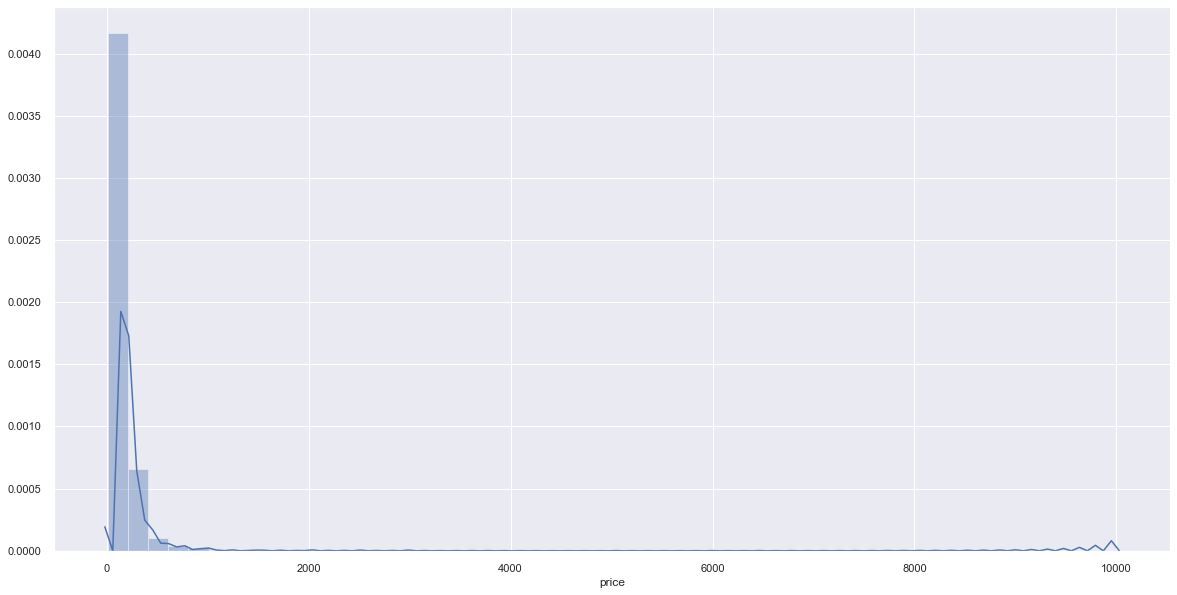

In [289]:
sns.distplot(data.price)

In [290]:
100* data[data.price < 500].shape[0] / data.shape[0]

97.47169734067599

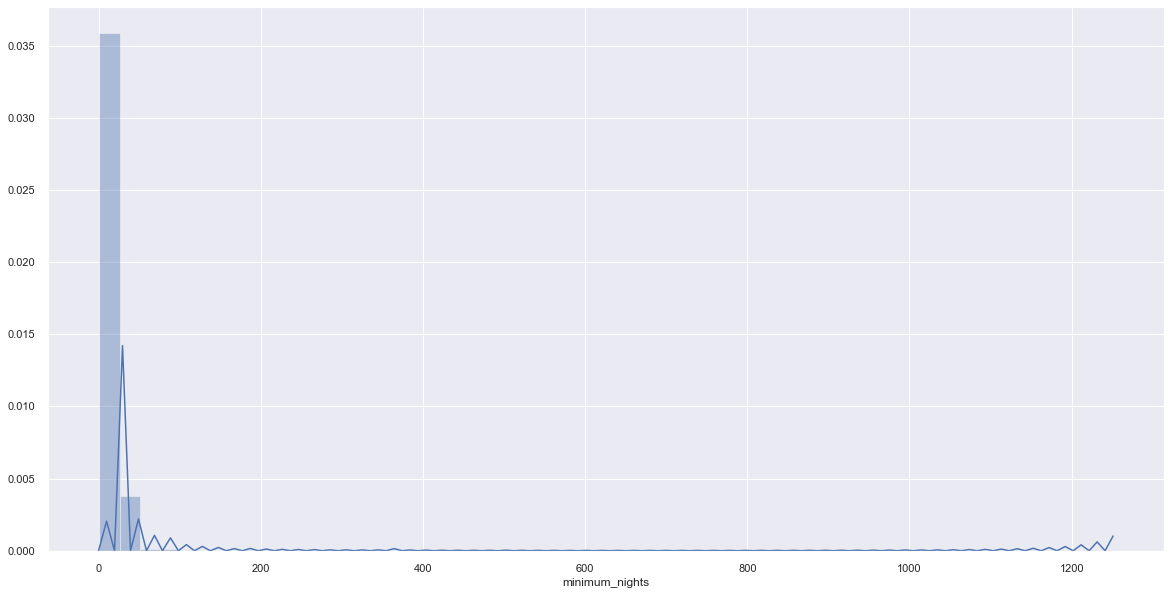

In [291]:
sns.distplot(data.minimum_nights)

In [292]:
100* data[data.minimum_nights < 100].shape[0] / data.shape[0]

99.61512477736606

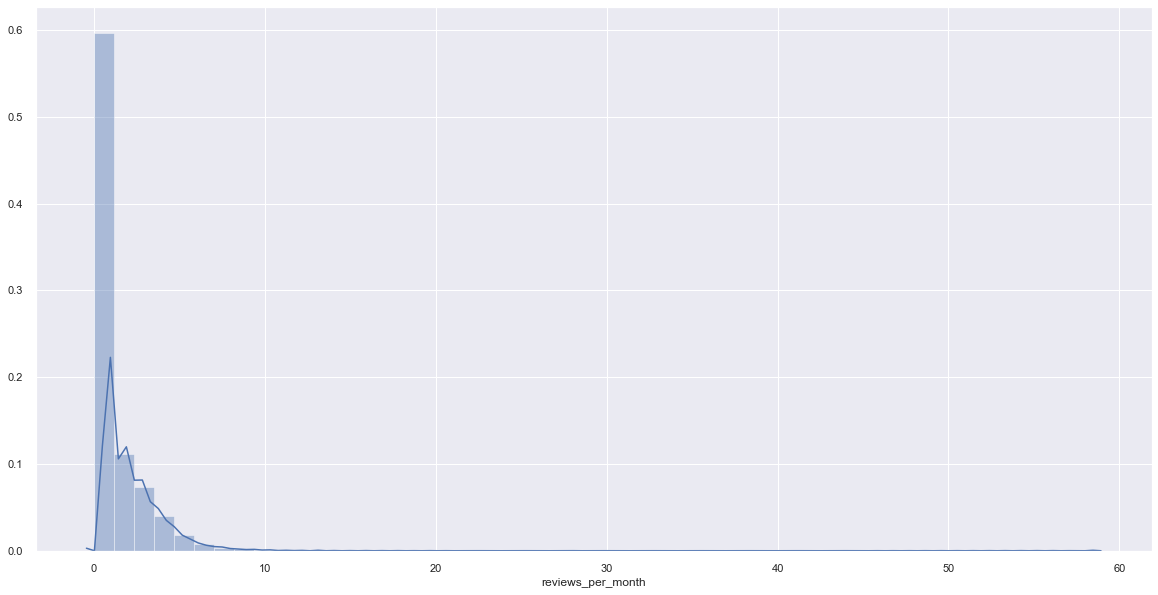

In [293]:
sns.distplot(data.reviews_per_month)

In [294]:
100* data[data.reviews_per_month < 5].shape[0] / data.shape[0]

96.82682662190103

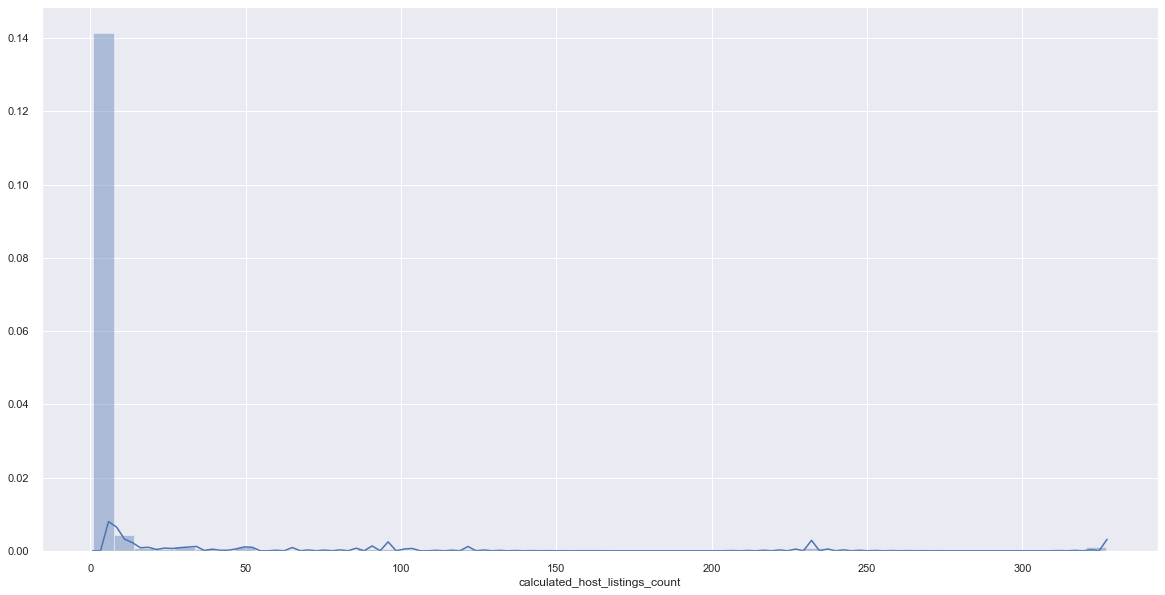

In [295]:
sns.distplot(data.calculated_host_listings_count)

In [296]:
100* data[data.calculated_host_listings_count < 10].shape[0] / data.shape[0]

93.49601817921264

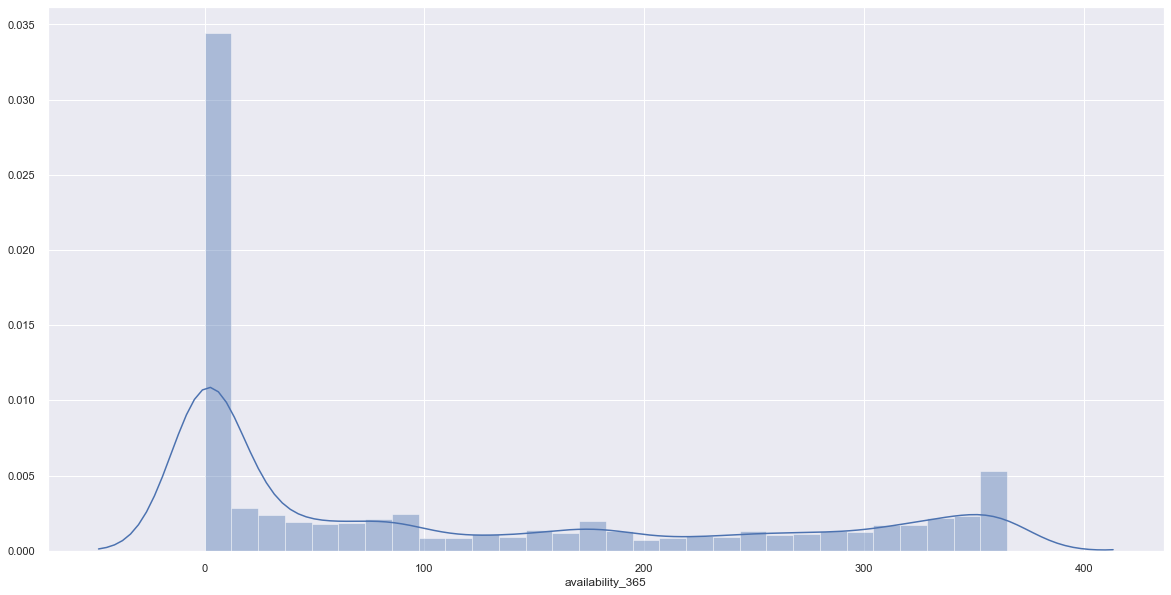

In [297]:
sns.distplot(data.availability_365)

In [298]:
100* data[data.availability_365 < 40].shape[0] / data.shape[0]

48.9241918643929

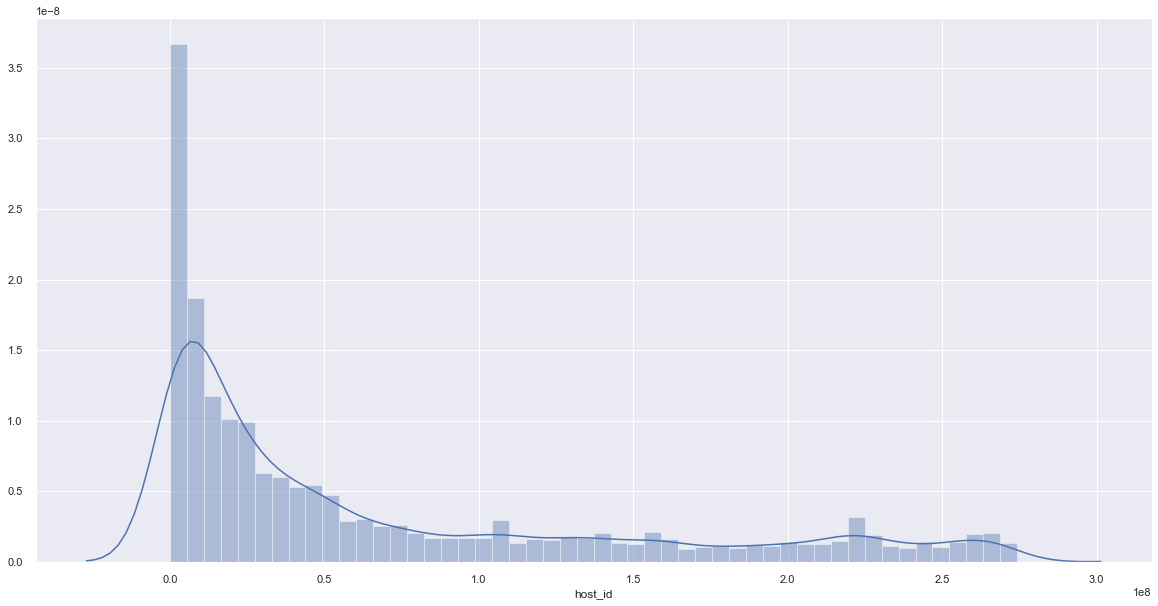

In [299]:
sns.distplot(data.host_id)

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

In [300]:
import numpy as np
data['logprice'] = np.log(data.price)

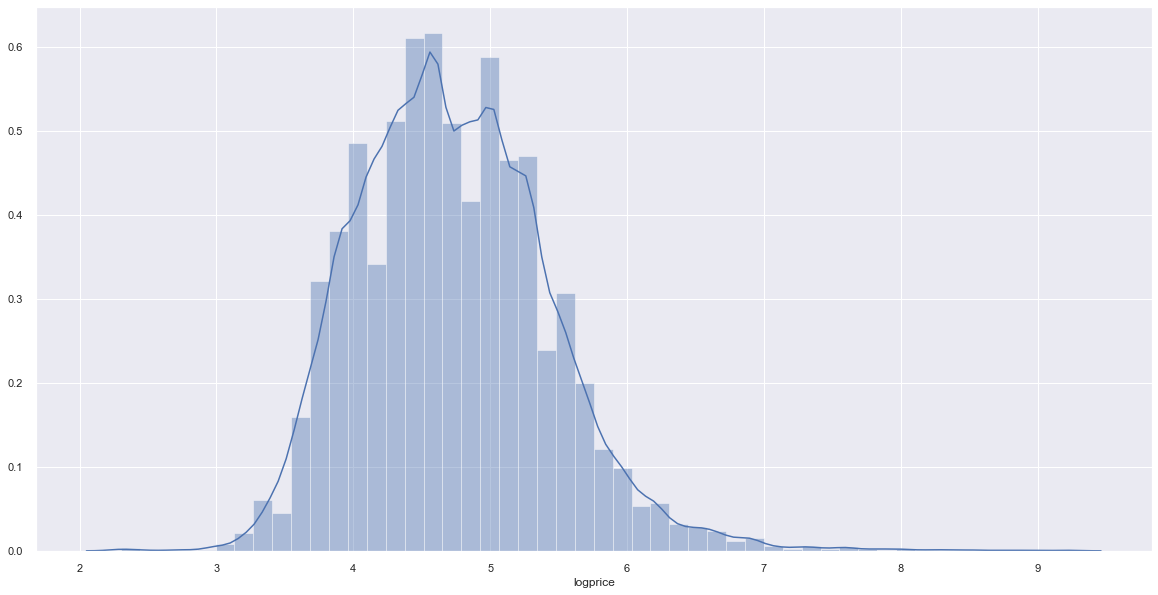

In [301]:
sns.distplot(data.logprice)


#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

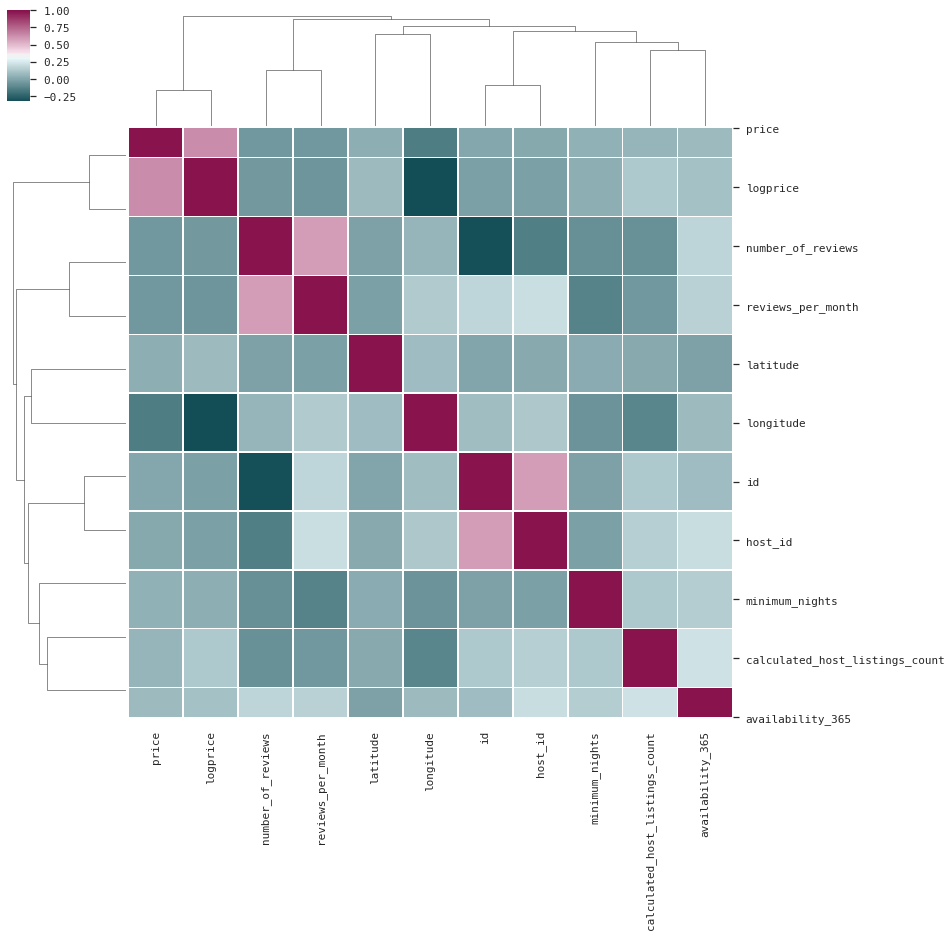

In [302]:
sns.set(font="monospace")
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
maps = sns.clustermap(data.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)
maps.savefig("correlation.png")

In [303]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,logprice
id,1,0.588247,-0.00310619,0.091062,0.010585,-0.0120423,-0.32006,0.180113,0.133227,0.0856165,-0.0157937
host_id,0.588247,1,0.0201676,0.127165,0.0153124,-0.0170546,-0.140347,0.209612,0.154953,0.203684,-0.0174476
latitude,-0.00310619,0.0201676,1,0.0848606,0.0339043,0.0259171,-0.0151662,-0.0186637,0.0195481,-0.0107334,0.0794621
longitude,0.091062,0.127165,0.0848606,1,-0.149889,-0.0629189,0.0590722,0.138678,-0.114748,0.082692,-0.32603
price,0.010585,0.0153124,0.0339043,-0.149889,1,0.0428097,-0.04792,-0.0505522,0.0574498,0.0818358,0.638186
minimum_nights,-0.0120423,-0.0170546,0.0259171,-0.0629189,0.0428097,1,-0.081573,-0.127342,0.131315,0.145924,0.032205
number_of_reviews,-0.32006,-0.140347,-0.0151662,0.0590722,-0.04792,-0.081573,1,0.589125,-0.0724168,0.171803,-0.0423708
reviews_per_month,0.180113,0.209612,-0.0186637,0.138678,-0.0505522,-0.127342,0.589125,1,-0.0473752,0.163683,-0.0604225
calculated_host_listings_count,0.133227,0.154953,0.0195481,-0.114748,0.0574498,0.131315,-0.0724168,-0.0473752,1,0.225795,0.132679
availability_365,0.0856165,0.203684,-0.0107334,0.082692,0.0818358,0.145924,0.171803,0.163683,0.225795,1,0.0987987


#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

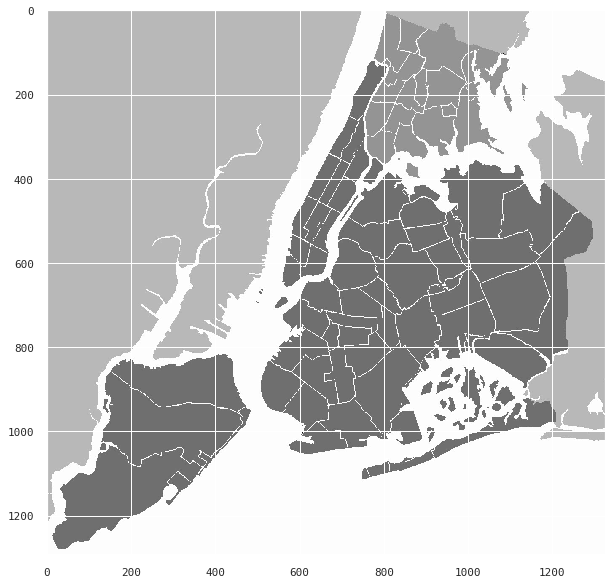

In [304]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.scatter(x = data.latitude, y = data.longitude)
plt.imshow(nyc)
plt.show()

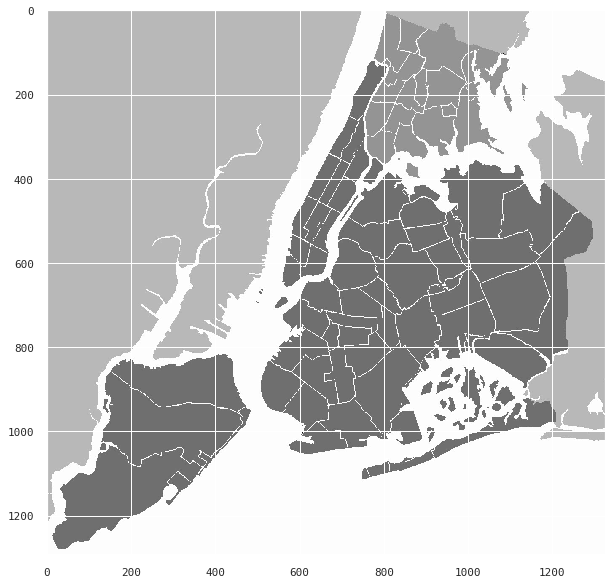

In [305]:
import matplotlib.pyplot as plt
img = plt.imread("New_York_City_.png",0)
fig, ax = plt.subplots()
ax.imshow(img)


### Analyses complémentaires 

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

In [307]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'logprice'],
      dtype='object')

In [308]:
data.drop(['id','host_id','name','host_name'], inplace=True, axis=1)

In [309]:
data = pd.get_dummies(data, columns=['neighbourhood'])

In [310]:
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,...,0,0,0,0,0,0,0,0,0,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,...,0,0,0,0,0,0,0,0,0,0
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,...,0,0,0,0,0,0,0,0,0,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,...,0,0,0,0,0,0,0,0,0,0


In [311]:
def encode_room(x):
    if x == 'Private room':
        return 0
    elif x=='Entire home/apt':
        return 1
    else: return 2
    
data.room_type = data.room_type.apply(encode_room)

In [312]:
from datetime import datetime
data.last_review = pd.to_datetime(data.last_review)

In [313]:
data['day'] = data.last_review.apply(lambda x: x.day)
data['month'] = data.last_review.apply(lambda x: x.month)
data['year']= data.last_review.apply(lambda x: x.year)

In [314]:
data.drop(['last_review'],axis=1,inplace = True)

In [315]:
data.head(5)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,day,month,year
0,Brooklyn,40.64749,-73.97237,0,149.0,1,9,0.21,6,365,...,0,0,0,0,0,0,0,19,10,2018
1,Manhattan,40.75362,-73.98377,1,225.0,1,45,0.38,2,355,...,0,0,0,0,0,0,0,21,5,2019
2,Manhattan,40.80902,-73.94190,0,150.0,3,0,0.00,1,365,...,0,0,0,0,0,0,0,1,1,1970
3,Brooklyn,40.68514,-73.95976,1,89.0,1,270,4.64,1,194,...,0,0,0,0,0,0,0,5,7,2019
4,Manhattan,40.79851,-73.94399,1,80.0,10,9,0.10,1,0,...,0,0,0,0,0,0,0,19,11,2018


In [316]:
data = pd.get_dummies(data, columns=['neighbourhood_group'])

In [317]:
data.dtypes

latitude                             float64
longitude                            float64
room_type                              int64
price                                float64
minimum_nights                         int64
                                      ...   
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
Length: 239, dtype: object

In [318]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

new_data = scaler.fit_transform(data)

In [319]:
df = pd.DataFrame(data=new_data, columns=data.columns)

In [320]:
df.head(5)

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,logprice,...,neighbourhood_Woodrow,neighbourhood_Woodside,day,month,year,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-1.493796,-0.437464,-1.048071,-0.015712,-0.300301,-0.320327,-0.551605,-0.034853,1.916204,0.396483,...,-0.004525,-0.069528,0.586883,1.589406,0.493023,-0.150934,1.196921,-0.891917,-0.362164,-0.08772
1,0.452513,-0.684426,0.799795,0.300631,-0.300301,0.487751,-0.445167,-0.156183,1.840224,0.986757,...,-0.004525,-0.069528,0.774769,-0.036113,0.544204,-0.150934,-0.835477,1.121181,-0.362164,-0.08772
2,1.468489,0.222618,-1.048071,-0.011549,-0.200406,-0.522346,-0.683086,-0.186515,1.916204,0.406063,...,-0.004525,-0.069528,-1.104091,-1.336529,-1.963659,-0.150934,-0.835477,1.121181,-0.362164,-0.08772
3,-0.803336,-0.164289,0.799795,-0.265456,-0.300301,5.538234,2.222028,-0.186515,0.616956,-0.341528,...,-0.004525,-0.069528,-0.728319,0.614095,0.544204,-0.150934,1.196921,-0.891917,-0.362164,-0.08772
4,1.275747,0.177342,0.799795,-0.302917,0.149224,-0.320327,-0.620476,-0.186515,-0.857045,-0.494212,...,-0.004525,-0.069528,0.586883,1.914510,0.493023,-0.150934,-0.835477,1.121181,-0.362164,-0.08772


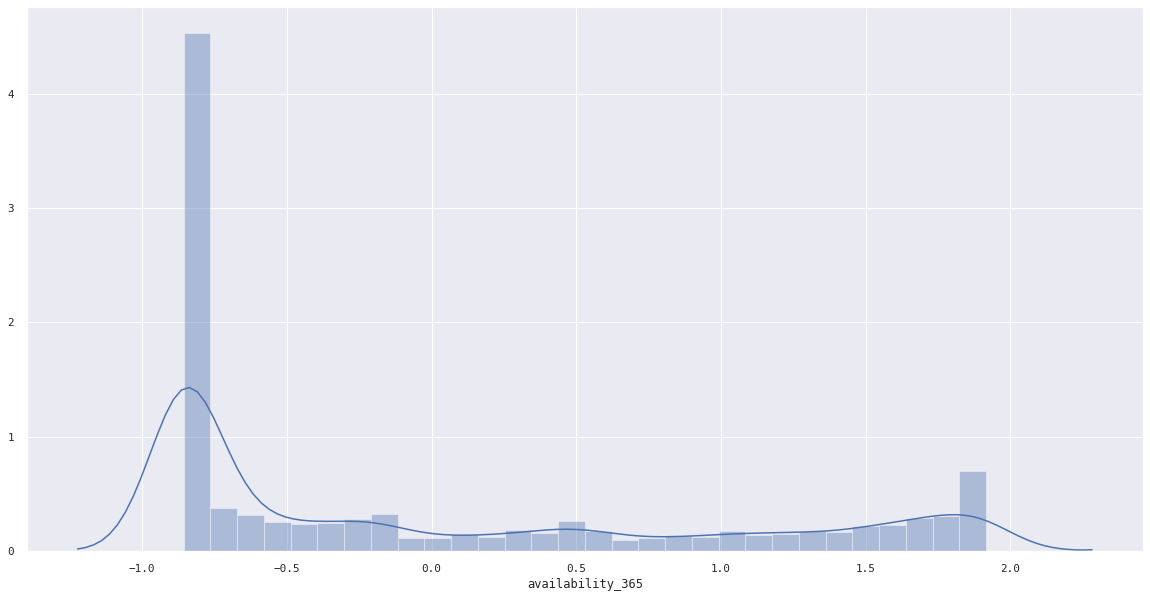

In [321]:
import seaborn as sns
sns.distplot(df.availability_365)

### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.

# Modele lineaire

In [322]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [323]:
target = 'logprice'

features = [col for col in df.columns if col not in ['logprice','price']]

In [324]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.3,
    random_state=42
)

In [325]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [326]:
result = lm.predict(X_test)

In [327]:
mean_squared_error(result, y_test)

0.5782974128518774

In [328]:
import numpy as np
np.sqrt(mean_squared_error(np.exp(result), np.exp(y_test)))

12.394008176146146

In [342]:
lm.intercept_

0.0012526538028120055

In [329]:
import time
from sklearn.linear_model import LassoLarsIC
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print(t_bic)
print(alpha_bic_)

1.436628818511963
7.418049607557348e-05


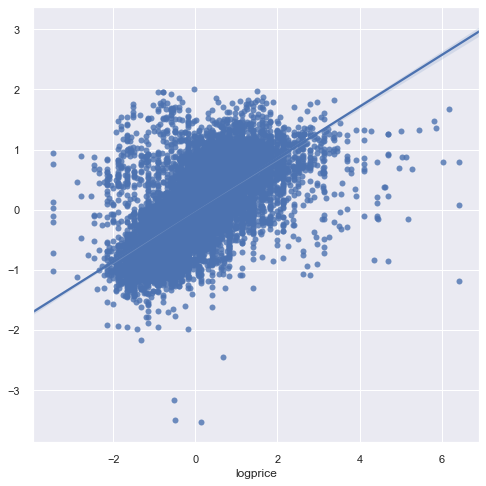

In [338]:
sns.regplot(x = y_test, y = result)

plt.show()

In [345]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data[target],
    test_size=0.3,
    random_state=42
)

In [346]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [347]:
result = lm2.predict(X_test)

In [348]:
mean_squared_error(result, y_test)

0.28181059210985226

In [349]:
np.sqrt(mean_squared_error(np.exp(result), np.exp(y_test)))

252.143888506107

In [350]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_
print(t_bic)
print(alpha_bic_)

1.386857032775879
5.179589344481816e-05


In [351]:
%config IPCompleter.greedy=True

# Modele d'arbre

In [374]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, max_depth=6)

In [375]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [354]:
res = model.predict(X_test)

In [355]:
mean_squared_error(res, y_test)

0.22094761505902688

In [356]:
np.sqrt(mean_squared_error(np.exp(res), np.exp(y_test)))

250.06830435092624

In [357]:
mean_absolute_error(np.exp(res), np.exp(y_test))

61.225511592967266

In [358]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

In [359]:
feature_importances_md1 = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [360]:
feature_importances_md1

,importance
room_type,0.692457
longitude,0.124881
latitude,0.074006
availability_365,0.035995
neighbourhood_group_Manhattan,0.020416
...,...
neighbourhood_Co-op City,0.000000
neighbourhood_Manhattan Beach,0.000000
neighbourhood_College Point,0.000000
neighbourhood_Columbia St,0.000000


In [361]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators = 1000, max_depth=6)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df[target],
    test_size=0.3,
    random_state=42
)

In [363]:
model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [364]:
res2=model2.predict(X_test)

In [365]:
mean_squared_error(np.exp(res2), np.exp(y_test))

153.50168908562782

In [366]:
mean_absolute_error(np.exp(res2), np.exp(y_test))

1.331342803915483

In [367]:
model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_train, y_train)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

In [368]:
feature_importances_md2 = pd.DataFrame(model2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [369]:
feature_importances_md2

,importance
room_type,0.692890
longitude,0.124209
latitude,0.073909
availability_365,0.035958
neighbourhood_group_Manhattan,0.020654
...,...
neighbourhood_Middle Village,0.000000
neighbourhood_Melrose,0.000000
neighbourhood_Co-op City,0.000000
neighbourhood_Marble Hill,0.000000
